**TASK 1** DATA CLEANING

In [34]:
import pandas as pd

In [35]:
df = pd.read_csv("retail_dataset.csv")
df.head()

,Transaction ID,Customer ID,Product Category,Quantity,Price,Date,Region
0,T001,C015,Books,7.0,167.0,02-02-2023,North
1,T002,C004,Toys,4.0,374.0,17-02-2023,South
2,T003,C033,Furniture,8.0,1059.0,17-05-2024,South
3,T004,C047,Groceries,5.0,304.0,11-02-2024,South
4,T005,C022,Books,7.0,282.0,27-07-2024,West


In [36]:
df.isnull().sum()

Transaction ID      0
Customer ID         0
Product Category    0
Quantity            2
Price               5
Date                0
Region              0
dtype: int64

In [37]:
price_mean = df["Price"].mean()
price_mean

np.float64(820.5263157894736)

In [38]:
df["Price"] = df["Price"].fillna(price_mean)

In [39]:
quantity_mean = df["Quantity"].mean()
quantity_mean

np.float64(5.959183673469388)

In [40]:
df["Quantity"] = df["Quantity"].fillna(quantity_mean)

In [41]:
df.isnull().sum()            #no null values remain

Transaction ID      0
Customer ID         0
Product Category    0
Quantity            0
Price               0
Date                0
Region              0
dtype: int64

In [42]:
df.dropna(subset=['Product Category', 'Region'], inplace=True)      #if there were null values in these two columns we will drop


**TASK 2** REVENUE CALCULATION WITH NUMPY

In [43]:
import numpy as np

In [44]:
df['Revenue'] = np.multiply(df['Quantity'], df['Price'])

In [45]:
df["Revenue"].head()

0    1169.0
1    1496.0
2    8472.0
3    1520.0
4    1974.0
Name: Revenue, dtype: float64

In [46]:
df.head()

,Transaction ID,Customer ID,Product Category,Quantity,Price,Date,Region,Revenue
0,T001,C015,Books,7.0,167.0,02-02-2023,North,1169.0
1,T002,C004,Toys,4.0,374.0,17-02-2023,South,1496.0
2,T003,C033,Furniture,8.0,1059.0,17-05-2024,South,8472.0
3,T004,C047,Groceries,5.0,304.0,11-02-2024,South,1520.0
4,T005,C022,Books,7.0,282.0,27-07-2024,West,1974.0


In [47]:
total_revenue = np.sum(df['Revenue'])
print("Total Revenue:", total_revenue)

Total Revenue: 491834.8711063373


**TASK 3** ANALYSIS BY PRODUCT CATEGORY

In [48]:
category_revenue = df.groupby("Product Category")["Revenue"].sum()
print("Total revenue of each category")
category_revenue

Total revenue of each category


Product Category
Beauty          28691.000000
Books           29597.938776
Clothing        89086.000000
Electronics     93204.315789
Furniture      129664.526316
Groceries       16850.000000
Sports          44229.000000
Toys            60512.090226
Name: Revenue, dtype: float64

In [49]:
sorted_revenue = category_revenue.sort_values(ascending=False)

In [50]:
sorted_revenue.head(3)        #top 3 category based on revenue

Product Category
Furniture      129664.526316
Electronics     93204.315789
Clothing        89086.000000
Name: Revenue, dtype: float64

In [51]:
sorted_revenue.tail(3)         #bottom 3 category based on revenue

Product Category
Books        29597.938776
Beauty       28691.000000
Groceries    16850.000000
Name: Revenue, dtype: float64

**TASK 4** REGIONAL REVENUE ANALYSIS

In [52]:
region_revenue = df.groupby("Region")["Revenue"].sum()
print("Total revenue of each region:")
region_revenue

Total revenue of each region:


Region
East     135184.044039
North    169553.563910
South    105899.736842
West      81197.526316
Name: Revenue, dtype: float64

In [53]:
sort_value = region_revenue.sort_values(ascending=False)

In [54]:
sort_value.head(1)             #region with higest revenue

Region
North    169553.56391
Name: Revenue, dtype: float64

In [55]:
sort_value.tail(1)              #region with lowest revenue

Region
West    81197.526316
Name: Revenue, dtype: float64

**TASK 5** TIME-BASED ANALYSIS

In [56]:
# Ensure the "Date" column is in datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Extract year and month into new columns
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.strftime('%b')
df.head(5)


,Transaction ID,Customer ID,Product Category,Quantity,Price,Date,Region,Revenue,Year,Month
0,T001,C015,Books,7.0,167.0,2023-02-02,North,1169.0,2023,Feb
1,T002,C004,Toys,4.0,374.0,2023-02-17,South,1496.0,2023,Feb
2,T003,C033,Furniture,8.0,1059.0,2024-05-17,South,8472.0,2024,May
3,T004,C047,Groceries,5.0,304.0,2024-02-11,South,1520.0,2024,Feb
4,T005,C022,Books,7.0,282.0,2024-07-27,West,1974.0,2024,Jul


In [57]:
monthly_revenue = df.groupby("Month")["Revenue"].sum()
print("Monthly revenue:")
monthly_revenue

Monthly revenue:


Month
Apr    57298.526316
Aug    76958.000000
Dec    44383.000000
Feb    33028.000000
Jan    50558.210526
Jul    47851.292159
Jun    37935.000000
Mar    10557.000000
May    27915.000000
Nov    32534.736842
Oct    42097.000000
Sep    30719.105263
Name: Revenue, dtype: float64

In [58]:
import pandas as pd
# Convert month names to datetime (dummy year used)
monthly_revenue.index = pd.to_datetime(monthly_revenue.index, format='%b')

# Sort by this datetime index
monthly_revenue = monthly_revenue.sort_index()

# Convert back to month short names for display
monthly_revenue.index = monthly_revenue.index.strftime('%b')

print(monthly_revenue)


Month
Jan    50558.210526
Feb    33028.000000
Mar    10557.000000
Apr    57298.526316
May    27915.000000
Jun    37935.000000
Jul    47851.292159
Aug    76958.000000
Sep    30719.105263
Oct    42097.000000
Nov    32534.736842
Dec    44383.000000
Name: Revenue, dtype: float64


In [59]:
monthly_revenue.sort_values()

Month
Mar    10557.000000
May    27915.000000
Sep    30719.105263
Nov    32534.736842
Feb    33028.000000
Jun    37935.000000
Oct    42097.000000
Dec    44383.000000
Jul    47851.292159
Jan    50558.210526
Apr    57298.526316
Aug    76958.000000
Name: Revenue, dtype: float64

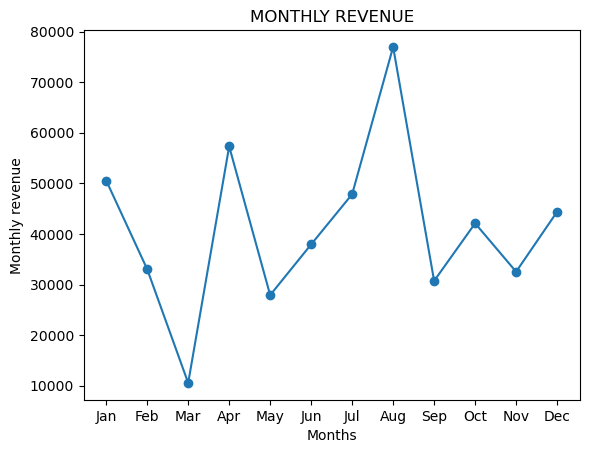

In [60]:
import matplotlib.pyplot as plt
plt.plot(monthly_revenue, marker = 'o')
plt.xlabel("Months")
plt.ylabel("Monthly revenue")
plt.title("MONTHLY REVENUE")
plt.show()

* Trend & Seasonal Insights

1. Overall upward trend (Jan–Aug): 

Revenue generally rises from the start of the year (March → August), peaking in August (₹76,958).
This suggests a strong summer season or mid-year demand surge.

2. Peak month — August:

August clearly outperforms all others. This might indicate seasonal sales, festive preparation, or mid-year promotions.

3. Dip after August:

After August, revenue drops gradually toward the end of the year (though still decent in Oct–Dec).
It may suggest post-season slowdown after the main sales cycle.

3. Low-activity months:

March shows the lowest revenue (₹10,557),

possibly a post-festive or off-season phase.

Sales seem to pick up again from May onwards.

**TASK 6** CUSTOMER INSIGHTS

In [61]:
customer_revenue = df.groupby("Customer ID")["Revenue"].sum()
print("Revenue from each customer:")
customer_revenue.head(10)

Revenue from each customer:


Customer ID
C001     3381.000000
C002     2145.000000
C003    19809.105263
C004     5454.000000
C005     4200.000000
C006     6827.000000
C007    11448.000000
C008    16212.000000
C009    13100.000000
C010    24181.000000
Name: Revenue, dtype: float64

In [62]:
customer_revenue.sort_values(ascending=False).head(5)    #top 5 customers contributing most revenue

Customer ID
C018    40557.142857
C022    37256.000000
C036    29010.000000
C010    24181.000000
C041    20347.947368
Name: Revenue, dtype: float64

**BONUS TASK**

In [63]:
import numpy as np

# Revenue data
revenues = df['Revenue']

# Mean
mean_revenue = np.mean(revenues)

# Median
median_revenue = np.median(revenues)

# Standard deviation
std_revenue = np.std(revenues)

print("Mean Revenue:", mean_revenue)
print("Median Revenue:", median_revenue)
print("Standard Deviation of Revenue:", std_revenue)

Mean Revenue: 4918.348711063373
Median Revenue: 3466.5
Standard Deviation of Revenue: 4646.774020595719
